In [1]:
from sympy.physics.quantum.state import Bra, Ket
from sympy.physics.quantum.dagger import Dagger
from sympy.physics.quantum import qapply, Bra, Ket
from sympy.matrices import Matrix
from sympy import expand, symbols, exp, I, re
import numpy as np
from scipy import stats

from matplotlib import pyplot as plt

In [2]:
eigsflat = np.array([
    - 23.442272793716487, 19.004491524638112, 10.704953919622609,
    - 9.621061750193316, - 9.291876841639265, 8.549368117337778,
    - 8.360110146581128, 7.767351743573174, 6.643581024354575,
    6.210113159280284, - 4.162113159280285, - 3.9404247973960653
])

eigsflat.sort()

eigsrot = np.array([
    - 23.442272793716548, 19.00449152463811, 9.964471647916524,
    - 9.621061750193306, 9.46334512720694, - 9.29187684163927,
    8.549368117337796, 7.767351743573205, - 7.627358032180682,
    - 7.084184486802904, 1.2108863842641737, 1.1688393595959694
])

eigsrot.sort()

 **(a) Calculate the moments of the density of states for each of these molecules.**

Here we will use the discrete definition of $n$-th moments with center located at $0$ $$ m_n  = \sum_i^N E_i^n$$. `scipy.stats` has a convenient but normalized function `scipy.stats.moment` for it.

In [3]:
moments_flat = []
moments_rot = []

nmoms = 4

for i in range(nmoms+1):

    moments_flat.append(stats.moment(eigsflat, order=i, center=0)*len(eigsflat))
    moments_rot.append(stats.moment(eigsrot, order=i, center=0)*len(eigsrot))

moments_flat = np.array(moments_flat)
moments_rot = np.array(moments_rot)

print(f"flat: {moments_flat}")
print(f"rot: {moments_rot}")


flat: [ 1.20000000e+01  6.20000000e-02  1.52307839e+03 -5.57603569e+03
  4.79437269e+05]
rot: [ 1.20000000e+01  6.20000000e-02  1.52307839e+03 -5.57693970e+03
  4.81229492e+05]


**(b) Using the moments theorem and the structural energy difference theorem assuming that the structures have equal repulsive energies when their second moments of the density of states are equal, predict which structure will be stable (for the neutral molecule), and explain why you predicted what you did.**

Firstly, let's do some sanity check if second moments of the density of states are equal. Due to the sensitivity of flaoting number precision, we use `np.isclose` instead.

In [4]:
print(np.isclose(moments_flat[2], moments_rot[2]))

True


Because only 2s and 2p states are included in the basis set, the total number of electrons is $2 \times 4 + 4 \times 1 = 12$. Therefore the electronic energies of flat and rotated structures are:

In [5]:
nelecs = 12

be_flat = eigsflat[:int(nelecs/2)].sum()*2
be_rot = eigsrot[:int(nelecs/2)].sum()*2

print(f"Bond energy (flat): {be_flat}")
print(f"Bond energy (rot): {be_rot}")

delta_be = be_rot - be_flat

print("Rotated" if delta_be < 0 else "Flat", f"isomer is more stable by {abs(delta_be)}")

Bond energy (flat): -117.6357189776131
Bond energy (rot): -111.79582908987348
Flat isomer is more stable by 5.839889887739616


Therefore, for the assumed structures and the given eigenvalues of electronic energies (or just bonding energies), flat ethylene is more stable than rotated isomer because $$\Delta E_\text{bond} = -111.7958 - -117.6357 = 5.8399 > 0$$

**(c) Plot the predictions for the difference in energy between the two structures as a function of electron filling. Is your plot consistent with the predictions you made in part (b) of this problem? Explain your answer.**

The total number of states (occupied and unoccupied) for the given basis set is $4 \times 2 + 1 \times 4 = 12$. Thus, the number of electrons can vary from $0$ to $24$.

In [13]:

nstates = len(eigsflat)

be_flat_all, be_rot_all = [], []

for nelecs in range(nstates*2 + 1):
    homo, nlone = nelecs // 2, nelecs % 2

    be_flat = eigsflat[:homo].sum()*2 
    if nlone > 0 and homo < nstates:
        be_flat += eigsflat[homo] * nlone
    be_rot = eigsrot[:homo].sum()*2
    if nlone > 0 and homo < nstates:
        be_rot += eigsrot[homo] * nlone
    
    be_flat_all.append(be_flat)
    be_rot_all.append(be_rot)
    
be_flat_all = np.array(be_flat_all)
be_rot_all = np.array(be_rot_all)

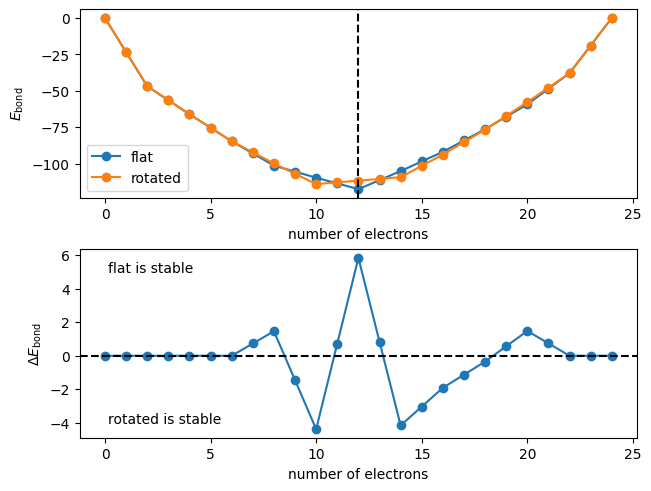

In [38]:

with plt.style.context('default'):
    

    fig, ax = plt.subplot_mosaic("""
                                 a
                                 b
                                 """, 
                                 constrained_layout=True)
    i = 'a'
    x = np.arange(nstates*2 + 1)
    ax[i].plot(x, be_flat_all, '-o', label='flat')
    ax[i].plot(x, be_rot_all, '-o', label='rotated')

    ax[i].axvline(12, ls='--', c='k')

    ax[i].legend()
    ax[i].set(
        xlabel='number of electrons',
        ylabel='$E_\\text{bond}$'
    )

    i = 'b'

    ax[i].plot(x, be_rot_all - be_flat_all, '-o')
    ax[i].axhline(0, ls='--', c='k')

    ax[i].text(0.05, 0.9, "flat is stable", transform=ax[i].transAxes, ha='left', va='center')
    ax[i].text(0.05, 0.1, "rotated is stable", transform=ax[i].transAxes, ha='left', va='center')


    ax[i].set(
        xlabel='number of electrons',
        ylabel='$\\Delta E_\\text{bond}$'
    )
    plt.show()

The plot is consistent with the prediction from (b), which must be as the calculation is the same. We can find that ethylene in neutral state or with +/- 1 electron is stable in flat conformation while rotated isomer is more stable for some charge states, and the there are degeneracies between these two isomers with very low and high occupacies. 